# 在Python中实现概率分布

## 二项分布（Binomial Distribution）
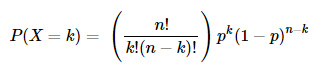
二项分布的例子：抛掷100次硬币，恰好两次正面朝上的概率是多少？

假设在该试验中正面朝上的概率为0.3，这意味着平均来说，我们可以期待有3次是硬币正面朝上的。我定义掷硬币的所有可能结果为k = np.arange(0,21)：你可能观测到0次正面朝上、1次正面朝上，一直到20次正面朝上。我使用stats.binom.pmf计算每次观测的概率质量函数。它返回一个含有21个元素的列表（list），这些元素表示与每个观测相关联的概率值。

[7.97922663e-04 6.83933711e-03 2.78458725e-02 7.16036722e-02
 1.30420974e-01 1.78863051e-01 1.91638983e-01 1.64261985e-01
 1.14396740e-01 6.53695655e-02 3.08170809e-02 1.20066549e-02
 3.85928193e-03 1.01783260e-03 2.18106985e-04 3.73897689e-05
 5.00755833e-06 5.04963865e-07 3.60688475e-08 1.62716605e-09
 3.48678440e-11]


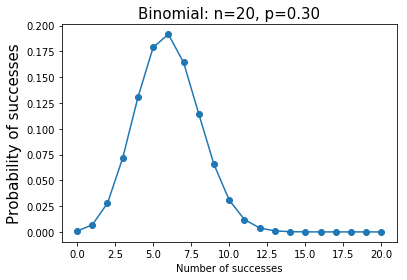

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = 20
p = 0.3
k = np.arange(0, 21)
binomial = stats.binom.pmf(k, n, p)
print(binomial)
plt.plot(k, binomial, 'o-')
plt.title('Binomial: n=%i, p=%.2f' % (n, p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize=15)
plt.show()

您可以使用.rvs函数模拟一个二项随机变量，其中参数size指定你要进行模拟的次数。我让Python返回10000个参数为n和p的二项式随机变量。我将输出这些随机变量的平均值和标准差，然后画出所有的随机变量的直方图。

Mean: 2.9738
SD: 1.4442


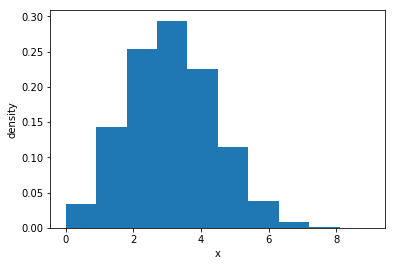

In [15]:
data = stats.binom.rvs(n=10, p=0.3, size=10000)
print("Mean: %g" % np.mean(data))
print("SD: %g" % np.std(data, ddof=1))
plt.hist(data, bins=10, normed=True)
plt.xlabel("x")
plt.ylabel("density")
plt.show()

## 泊松分布（Poisson Distribution）
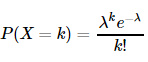
泊松分布的例子：已知某路口发生事故的比率是每天2次，那么在此处一天内发生4次事故的概率是多少？

让我们考虑这个平均每天发生2起事故的例子。泊松分布的实现和二项分布有些类似，在泊松分布中我们需要指定比率参数。泊松分布的输出是一个数列，包含了发生0次、1次、2次，直到10次事故的概率。

[1.35335283e-01 2.70670566e-01 2.70670566e-01 1.80447044e-01
 9.02235222e-02 3.60894089e-02 1.20298030e-02 3.43708656e-03
 8.59271640e-04 1.90949253e-04]


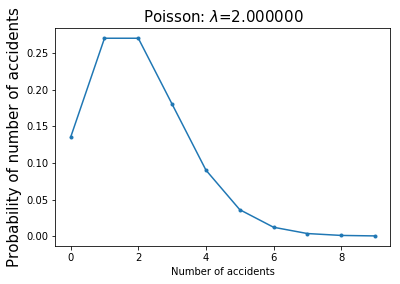

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rate = 2
n = np.arange(0, 10)
y = stats.poisson.pmf(n, rate)
print(y)
plt.plot(n, y, '.-')
plt.title('Poisson: $\lambda$=%f' % rate, fontsize=15)
plt.xlabel('Number of accidents')
plt.ylabel('Probability of number of accidents', fontsize=15)
plt.show()

你可以看到，事故次数的峰值在均值附近。平均来说，你可以预计事件发生的次数为λ。尝试不同的λ和n的值，然后看看分布的形状是怎么变化的。

现在我来模拟1000个服从泊松分布的随机变量。

Mean: 1.987
SD: 1.4257


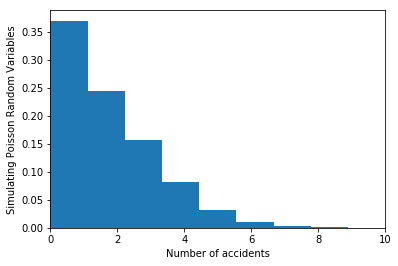

In [17]:
data = stats.poisson.rvs(mu=2, loc=0, size=10000)
print("Mean: %g" % np.mean(data))
print("SD: %g" % np.std(data, ddof=1))
plt.hist(data, bins=9, normed=True)
plt.xlim(0, 10)
plt.xlabel("Number of accidents")
plt.ylabel("Simulating Poisson Random Variables")
plt.show()

## 正态分布（Normal Distribution）
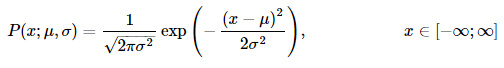
正态分布是一种连续分布，其函数可以在实线上的任何地方取值。正态分布由两个参数描述：分布的平均值μ和方差σ2 。

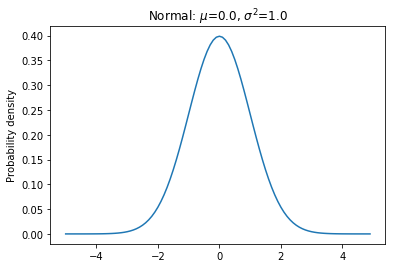

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

mu = 0 # mean
sigma = 1 # standard deviation
x = np.arange(-5, 5, 0.1)
y = stats.norm.pdf(x, 0, 1)

plt.plot(x, y)
plt.title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f' % (mu, sigma))
plt.ylabel('Probability density') # probability of observing each of these observations
plt.show()

## β分布（Beta Distribution）
β分布是一个取值在 [0, 1] 之间的连续分布，它由两个形态参数α和β的取值所刻画。
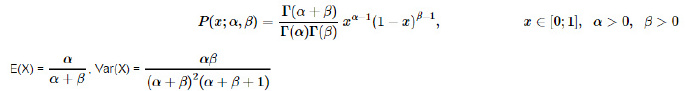

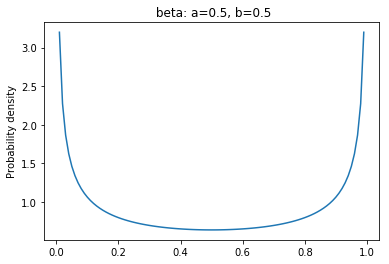

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

a = 0.5
b = 0.5
x = np.arange(0.01, 1, 0.01)
y = stats.beta.pdf(x, a, b)

plt.plot(x, y)
plt.title('beta: a=%.1f, b=%.1f' % (a, b))
plt.ylabel('Probability density')
plt.show()